### Abstract

For this project, I developed a library of random variate generation routines in Python. The routines are contained in a module called `RandomVariateGen.py`, which can be imported into other Python scripts or a Jupyter Notebook. The routines rely on several random variate generation techniques, including the Inverse Transform Method and the Box–Muller transform. Computations are primarily performed using the `NumPy` library, and the visualization feature is implemented through the `Matplotlib` library.

### Set up

This random variate generation Python library has only two dependencies: `NumPy` and `Matplotlib`. If the user does not already have them installed, they may do so easily with the following commands:

`pip install numpy`

`pip install matplotlib`

Once the two dependencies are installed, users are ready to get started using the random variate generation library.

The random variate generation routines are written as methods within a class called `RVGenerator`, which located in a module called `RandomVariateGen.py`. To import the `RVGenerator` (along with all of the random variate generation routines) simply import it as follows:

In [1]:
from RandomVariateGen import RVGenerator

Once the `RVGenerator` class is imported into the user's script or Jupyter Notebook, they may begin using its methods to generate various random variates.

Since `RVGenerator` is a class, it must be instantiated. Creating an instance of `RVGenerator` takes just two arguments, the number of desired random variates to be creating and an optional random seed.

For this example, I will create an instance of `RVGenerator` for creating 1,000,000 random variates and set a seed of 42.

In [2]:
generator = RVGenerator(num_vars=1000000, seed=42)

Now that we have created an instance of `RVGenerator` called `generator`, we may begin generating 1,000,000 random variates from various popular distributions.

### Uniform 

Let us start out with perhaps the most simple probablitiy distribution, the Uniform (0,1) distribution. The Uniform (0,1) distribution is essential for this library as all other distributions generating routines require Uniform (0,1) random numbers. For the generation of Uniform (0,1) random numbers, I rely on `NumPy`'s implementation, to which the documentation can be found here: https://numpy.org/doc/1.20/reference/random/generated/numpy.random.uniform.html.

While the generation of Uniform (0,1) random numbers is used as a prerequisites for all random variate generation in this library, the `RVGenerator` class also has a method for generating a Uniform (0,1) distribution on its own. Let us try out this method to generate 1,000,000 Uniform (0,1) random numbers, and set parameter `plot=True` so we can see the output of the distribution. 

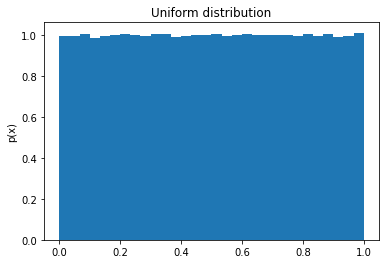

In [3]:
u = generator.uniform(plot=True)

As we can see from the output above, the returned distribution looks very nice and closely resembles the shape we would expect. 

### Normal

Next, let us try to generate our first random variates, using the random numbers we generated using the `uniform` method.

In particular, we will generate 1,000,000 random variates from a Standard Normal Distribution. The routine for generating Standard Normal random variates is based on the Box–Muller transform method as follows:
$$Z = \sqrt{-2 ln(U_{1})}\text{cos}(2\pi U_{2})$$

Where $U_{1}$ and $U_{2}$ are Uniform (0,1) random numbers.

The default of the `normal` method is to generate random variates from the Standard Normal distribution. Let us try this and plot the results.

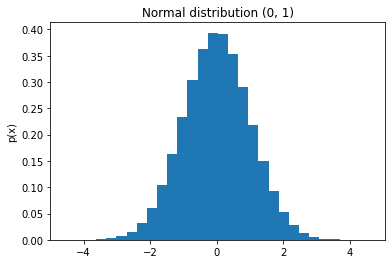

In [4]:
n = generator.normal(plot=True)

As we can see from the results, the distribution looks very close to what we would expect. The mean is clearly centered at zero and the variance appears to be one.

This method can be applied to easily generate random variates from any normal distribution, not just the Standard Normal. Let us try generating random variates from a normal distribution with $\mu=10$ and $\sigma=2.5$.

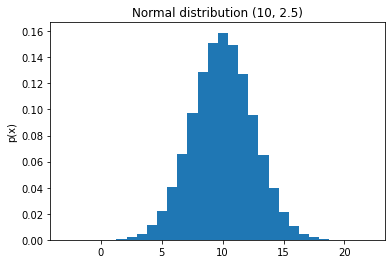

In [5]:
n = generator.normal(mu=10, sigma=2.5, plot=True)

Now, we can clearly see that the mean is centered at 10 and the variance is higher than for the standard normal.

### Exponential

Next let us consider the case of generating exponential random variates. To do so, we can use the Inverse Transform Method using our Uniform (0,1) random numbers. The Inverse Transform Method for exponential distributions is as follows:

$$E = -\frac{ln(1-U)}{\lambda }$$

For this method, we simply need to pass a value for $\lambda$ to the $L$ parameter. Let us try $\lambda=1$ and plot the results.

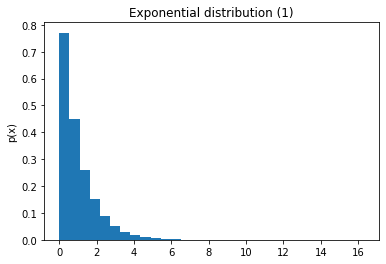

In [6]:
expo = generator.exponential(L=1, plot=True)

### Gamma

Next let us consider the Gamma distribution. Since we have already defined a method for generating exponential random variates, it is simple to obtain Gamma random variates. To do so, we simply add up $\beta$ exponentials with $\lambda = \alpha$.

Let us use the `gamma` method to generate gamma random variates with parameters $\alpha = 2$ and $\beta = 2$.

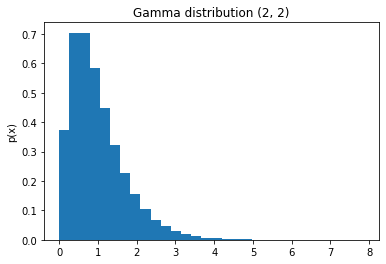

In [7]:
g1 = generator.gamma(alpha=2,beta=2, plot=True)

Let us briefly consider the case where $\beta = 1$ for the Gamma distribution. Given the definition of a Gamma distribution, we would expect the results to simply be a single exponential distribution. Let us try the `gamma` method again with $\alpha = 1$ and $\beta = 1$.

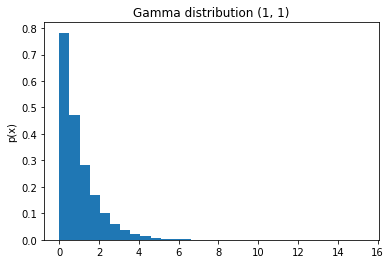

In [8]:
g2 = generator.gamma(alpha=1,beta=1, plot=True)

### Weibull

To generate random variates from the Weibull distribution, we can once again use the Inverse Transform Method as follows:

$$W = \alpha [-ln(1-U)]^{\frac{1}{\beta}}$$

Let us use the `weibull` to generate Weibull (1,2) random variates.

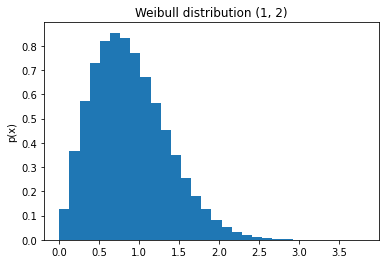

In [9]:
w1 = generator.weibull(alpha=1,beta=2, plot=True)

Let us briefly consider the special case of the Weibull distribution when $\beta = 1$. Based on the inverse CDF of the Weibull distribution, we can clealy see that we would simply obtain an exponential ($\alpha$) distribution. Let us test the $weibull$ method by generating a Weibull (1,1) and observing the distribution's shape.

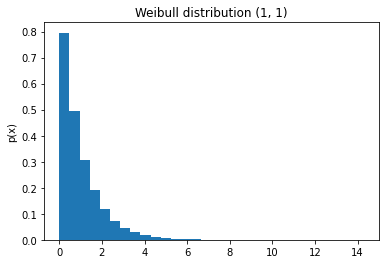

In [10]:
w2 = generator.weibull(alpha=1,beta=1, plot=True)

Indeed, we get the exact same results as for example in the `exponential` method section.

### Bernoulli

Next, let us try generating some discrete random variates. We can generate 1,000,000 independent Bernoulli (p) trials with the following Inverse Transform Method:

$$
\begin{cases}
1 & \text{if } U < p \\ 
0 & \text{else} 
\end{cases}
$$

Let us conduct 1,000,000 Bernoulli (0.75) trials using the `bernoulli` method and visualize the results.

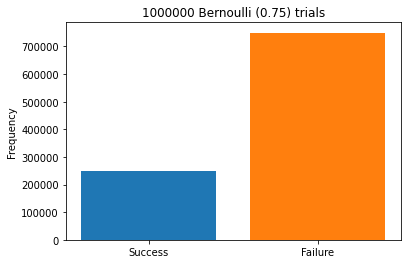

In [11]:
b = generator.bernoulli(p=0.75, plot=True)

### Geometric

Lastly, let us consider generating random variates from another discrete distribution, the geometric distribution. Once again, we can use the Inverse Transform Method to generate geometric random variates using our given Uniform (0,1) random numbers as follows:

$$
\left \lceil \frac{ln(U)}{ln(1-p)} \right \rceil
$$

The geometric distribution deals with the number of bernouli trials needed until the first success. We can use the `geometric` method to generate geometric (0.3) and plot the results.

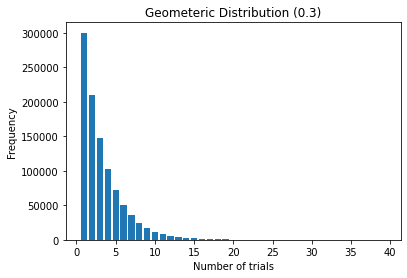

In [12]:
geo = generator.geometric(p=0.3, plot=True)

As we can see from the plot above, the X-axis indicates the number of trials needed until the first success, for 1,000,000 uniform random numbers. The shape of this bar chart looks as we would expect from this discrete distribution.